In [1]:
import subprocess

# Suppress output of pip install command
subprocess.run(['pip', 'install', 'pandas', 'numpy', 'scikit-learn'], stdout=subprocess.DEVNULL, stderr=subprocess.DEVNULL)

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.metrics import mean_squared_error


In [12]:
# Load the dataset and parse the 'date' column as datetime
df = pd.read_csv('sales.csv', parse_dates=['date'], index_col='date')

# Check the first few rows to ensure it loaded correctly
print(df.head())


               type    locale locale_name                    description  \
date                                                                       
2012-03-02  Holiday     Local       Manta             Fundacion de Manta   
2012-04-01  Holiday  Regional    Cotopaxi  Provincializacion de Cotopaxi   
2012-04-12  Holiday     Local      Cuenca            Fundacion de Cuenca   
2012-04-14  Holiday     Local    Libertad      Cantonizacion de Libertad   
2012-04-21  Holiday     Local    Riobamba      Cantonizacion de Riobamba   

            transferred  
date                     
2012-03-02        False  
2012-04-01        False  
2012-04-12        False  
2012-04-14        False  
2012-04-21        False  


In [13]:
# Get summary statistics
print(df.describe())

# Check for missing values
print(df.isnull().sum())


           type    locale locale_name description transferred
count       350       350         350         350         350
unique        6         3          24         103           2
top     Holiday  National     Ecuador    Carnaval       False
freq        221       174         174          10         338
type           0
locale         0
locale_name    0
description    0
transferred    0
dtype: int64


In [14]:
# Get unique values in categorical columns
print(df['type'].unique())
print(df['locale'].unique())
print(df['locale_name'].unique())


['Holiday' 'Transfer' 'Additional' 'Bridge' 'Work Day' 'Event']
['Local' 'Regional' 'National']
['Manta' 'Cotopaxi' 'Cuenca' 'Libertad' 'Riobamba' 'Puyo' 'Guaranda'
 'Imbabura' 'Latacunga' 'Machala' 'Santo Domingo' 'El Carmen' 'Cayambe'
 'Esmeraldas' 'Ecuador' 'Ambato' 'Ibarra' 'Quevedo'
 'Santo Domingo de los Tsachilas' 'Santa Elena' 'Quito' 'Loja' 'Salinas'
 'Guayaquil']


In [16]:
# Resample the data to monthly frequency using 'ME' for month-end
monthly_data = df.resample('ME').size()  # Count of holidays per month
print(monthly_data)


date
2012-03-31     1
2012-04-30     4
2012-05-31     1
2012-06-30     4
2012-07-31     3
              ..
2017-08-31     5
2017-09-30     2
2017-10-31     2
2017-11-30     7
2017-12-31    11
Freq: ME, Length: 70, dtype: int64


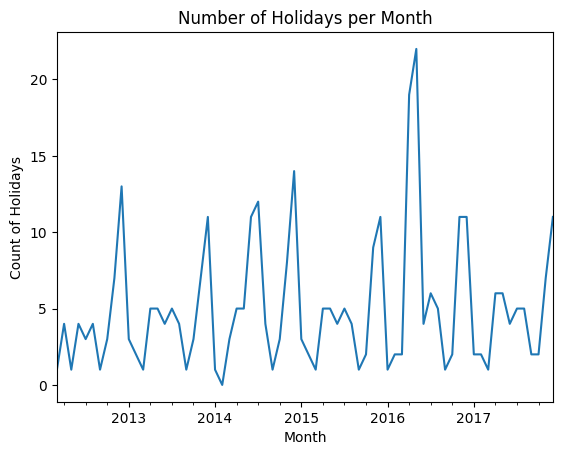

In [17]:
import matplotlib.pyplot as plt

# Plot the count of holidays per month
monthly_data.plot(kind='line', title='Number of Holidays per Month')
plt.xlabel('Month')
plt.ylabel('Count of Holidays')
plt.show()


In [18]:
# Filter the data for 'Local' holidays
local_holidays = df[df['type'] == 'Local']
print(local_holidays.head())


Empty DataFrame
Columns: [type, locale, locale_name, description, transferred]
Index: []


In [19]:
# Filter holidays between two dates
filtered_holidays = df['2012-04-01':'2012-04-30']
print(filtered_holidays)


               type    locale locale_name                    description  \
date                                                                       
2012-04-01  Holiday  Regional    Cotopaxi  Provincializacion de Cotopaxi   
2012-04-12  Holiday     Local      Cuenca            Fundacion de Cuenca   
2012-04-14  Holiday     Local    Libertad      Cantonizacion de Libertad   
2012-04-21  Holiday     Local    Riobamba      Cantonizacion de Riobamba   

            transferred  
date                     
2012-04-01        False  
2012-04-12        False  
2012-04-14        False  
2012-04-21        False  


In [20]:
# Check the count of transferred and not transferred holidays
print(df['transferred'].value_counts())


transferred
False    338
True      12
Name: count, dtype: int64


date
2012-10-31    1
2012-11-30    0
2012-12-31    0
2013-01-31    0
2013-02-28    0
             ..
2017-08-31    1
2017-09-30    1
2017-10-31    0
2017-11-30    0
2017-12-31    1
Freq: ME, Length: 63, dtype: int64


C:\Users\lenovo\AppData\Local\Temp\ipykernel_6508\2344946354.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  transferred_monthly = df[df['transferred']].resample('M').size()


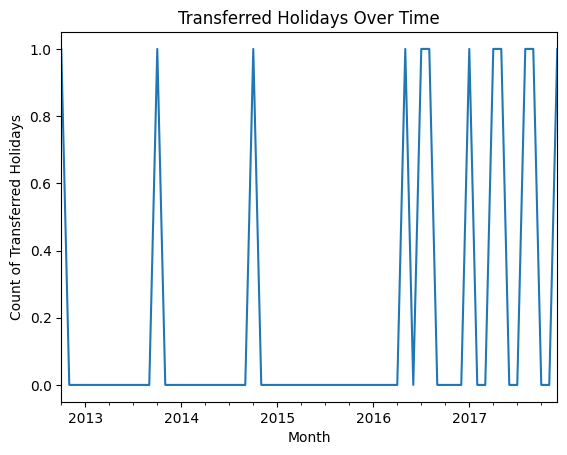

In [21]:
# Resample the data to get count of transferred holidays per month
transferred_monthly = df[df['transferred']].resample('M').size()
print(transferred_monthly)

# Plot transferred holidays over time
transferred_monthly.plot(kind='line', title='Transferred Holidays Over Time')
plt.xlabel('Month')
plt.ylabel('Count of Transferred Holidays')
plt.show()


In [22]:
# Group holidays by 'type' and 'locale' to count occurrences
grouped_data = df.groupby(['type', 'locale']).size()
print(grouped_data)


type        locale  
Additional  Local        11
            National     40
Bridge      National      5
Event       National     56
Holiday     Local       137
            National     60
            Regional     24
Transfer    Local         4
            National      8
Work Day    National      5
dtype: int64


In [23]:
# Save the modified dataframe to a new CSV file
df.to_csv('modified_sales.csv')


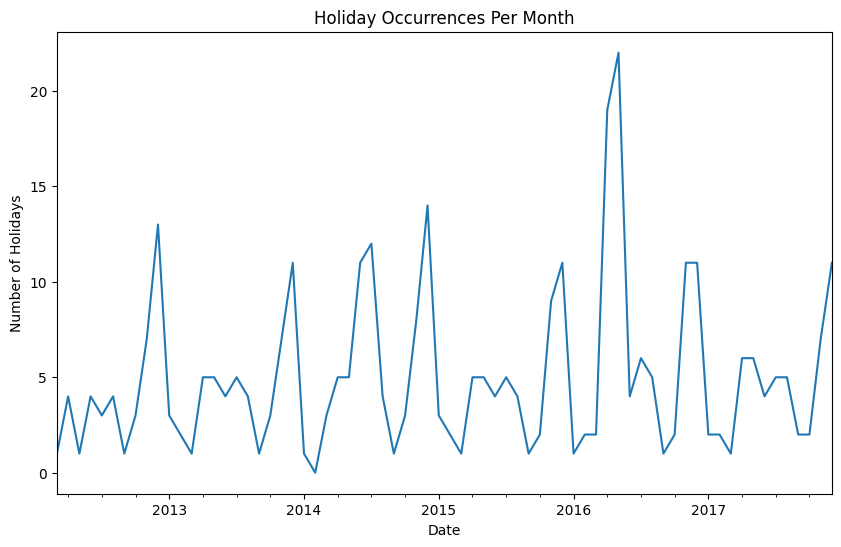

In [24]:
import matplotlib.pyplot as plt

monthly_data.plot(kind='line', figsize=(10, 6), title="Holiday Occurrences Per Month")
plt.xlabel('Date')
plt.ylabel('Number of Holidays')
plt.show()


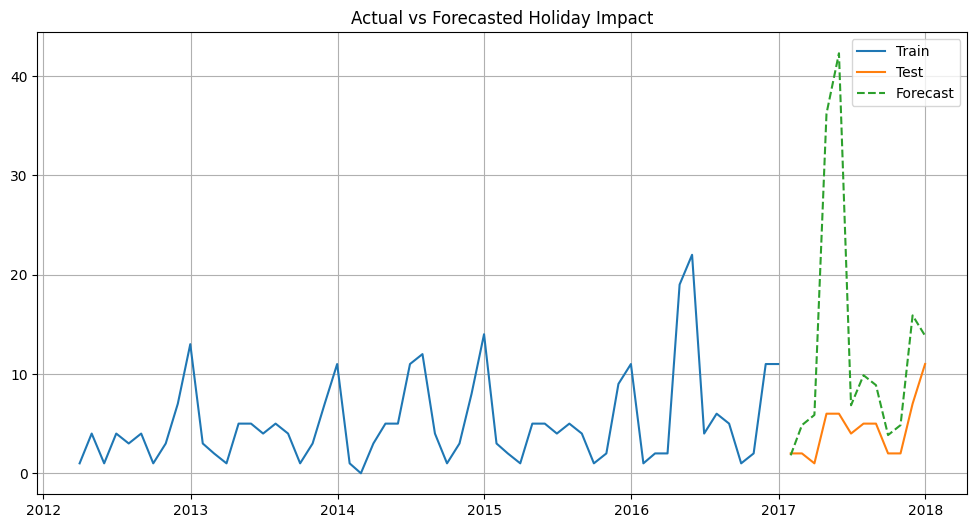

Mean Absolute Error (MAE): 8.54
Root Mean Squared Error (RMSE): 14.16


In [26]:
plt.figure(figsize=(12, 6))
plt.plot(train.index, train, label='Train')
plt.plot(test.index, test, label='Test')
plt.plot(forecast.index, forecast, label='Forecast', linestyle='--')
plt.legend()
plt.title('Actual vs Forecasted Holiday Impact')
plt.grid()
plt.show()

# Step 8: Evaluate the Model
mae = mean_absolute_error(test, forecast)
rmse = np.sqrt(mean_squared_error(test, forecast))
print(f'Mean Absolute Error (MAE): {mae:.2f}')
print(f'Root Mean Squared Error (RMSE): {rmse:.2f}')

# Step 9: Save the forecast (optional)
forecast_df = pd.DataFrame({
    'Actual': test,
    'Forecasted': forecast
})
forecast_df.to_csv('demand_forecast.csv')
